In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

# This guide can only be run with the TF backend.
os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf

import keras
from keras import layers

#Source py scripts
from data_processor import DataProcessor
#from plot_maker import PlotMaker
#from regressor_ann import ANN

In [33]:
dataframe = pd.read_csv("../bloomberg_values.csv")
print(dataframe)

          Date  EUDR1T Curncy  EUR001M Index  EUR003M Index  EUR006M Index  \
0     1/3/2000         3.0300          3.171          3.338          3.523   
1     1/4/2000         3.0100          3.159          3.343          3.553   
2     1/5/2000         2.9700          3.151          3.341          3.550   
3     1/6/2000         2.8700          3.131          3.331          3.552   
4     1/7/2000         2.8750          3.116          3.322          3.546   
...        ...            ...            ...            ...            ...   
6565  3/3/2025         2.7200          2.466          2.464          2.331   
6566  3/4/2025         2.6974          2.471          2.491          2.342   
6567  3/5/2025         2.6800          2.494          2.504          2.353   
6568  3/6/2025         2.7200          2.481          2.511          2.394   
6569  3/7/2025         2.7225          2.481          2.511          2.394   

      EUR009M Index  EREU001W Index  ER1 Comdty  ER2 Comdty  ER

In [34]:
targets = ["USGG3M Index"] #, "USGG2YR Index", "USGG10YR Index", "USGG30YR Index"]
predictors = ["SPX Index", "VIX Index", "GDP CQOQ Index", "CPI XYOY Index", "NAPMPMI Index", "IP  CHNG Index", "CPTICHNG Index", "USURTOT Index", "NFP TCH Index", "INJCJC Index", "LEI CHNG Index"]
date = ["Date"]

columns_subset = targets + predictors + date

data_subset = dataframe[columns_subset]

clean_dataframe = data_subset.dropna()
clean_dataframe.set_index(date, inplace=True)

predictor_set1 = clean_dataframe[targets]
target_set1 = clean_dataframe[predictors]

#df = DataProcessor(dataframe)
#df.set_date_index(date)
#df.set_predictors(predictors)
#df.set_targets(targets)

#target_set = df.get_target_set()
#predictor_set = df.get_predictor_set()


In [35]:
print(target_set1)
print(predictor_set1)

          SPX Index  VIX Index  GDP CQOQ Index  CPI XYOY Index  NAPMPMI Index  \
Date                                                                            
1/3/2000    1455.22      24.21             6.7             1.9           57.8   
1/4/2000    1399.42      27.01             6.7             1.9           57.8   
1/5/2000    1402.11      26.41             6.7             1.9           57.8   
1/6/2000    1403.45      25.73             6.7             1.9           57.8   
1/7/2000    1441.47      21.72             6.7             1.9           57.8   
...             ...        ...             ...             ...            ...   
3/3/2025    5849.72      22.78             2.3             3.3           50.3   
3/4/2025    5778.15      23.51             2.3             3.3           50.3   
3/5/2025    5842.63      21.93             2.3             3.3           50.3   
3/6/2025    5738.52      24.87             2.3             3.3           50.3   
3/7/2025    5770.20      23.

In [36]:
y_predictions = []

def train_val_test(data, iteration, training_size, validation_size, testing_size):
    start_idx = iteration * testing_size
    train_start = start_idx
    train_end = train_start + training_size
    val_end = train_end + validation_size
    test_end = val_end + testing_size

    # Slice the data
    train_df = data.iloc[train_start:train_end]
    val_df = data.iloc[train_end:val_end]
    test_df = data.iloc[val_end:test_end]

    return train_df, val_df, test_df


In [37]:
train_dataset = data_subset.sample(frac=0.8, random_state=0)
test_dataset = data_subset.drop(train_dataset.index)

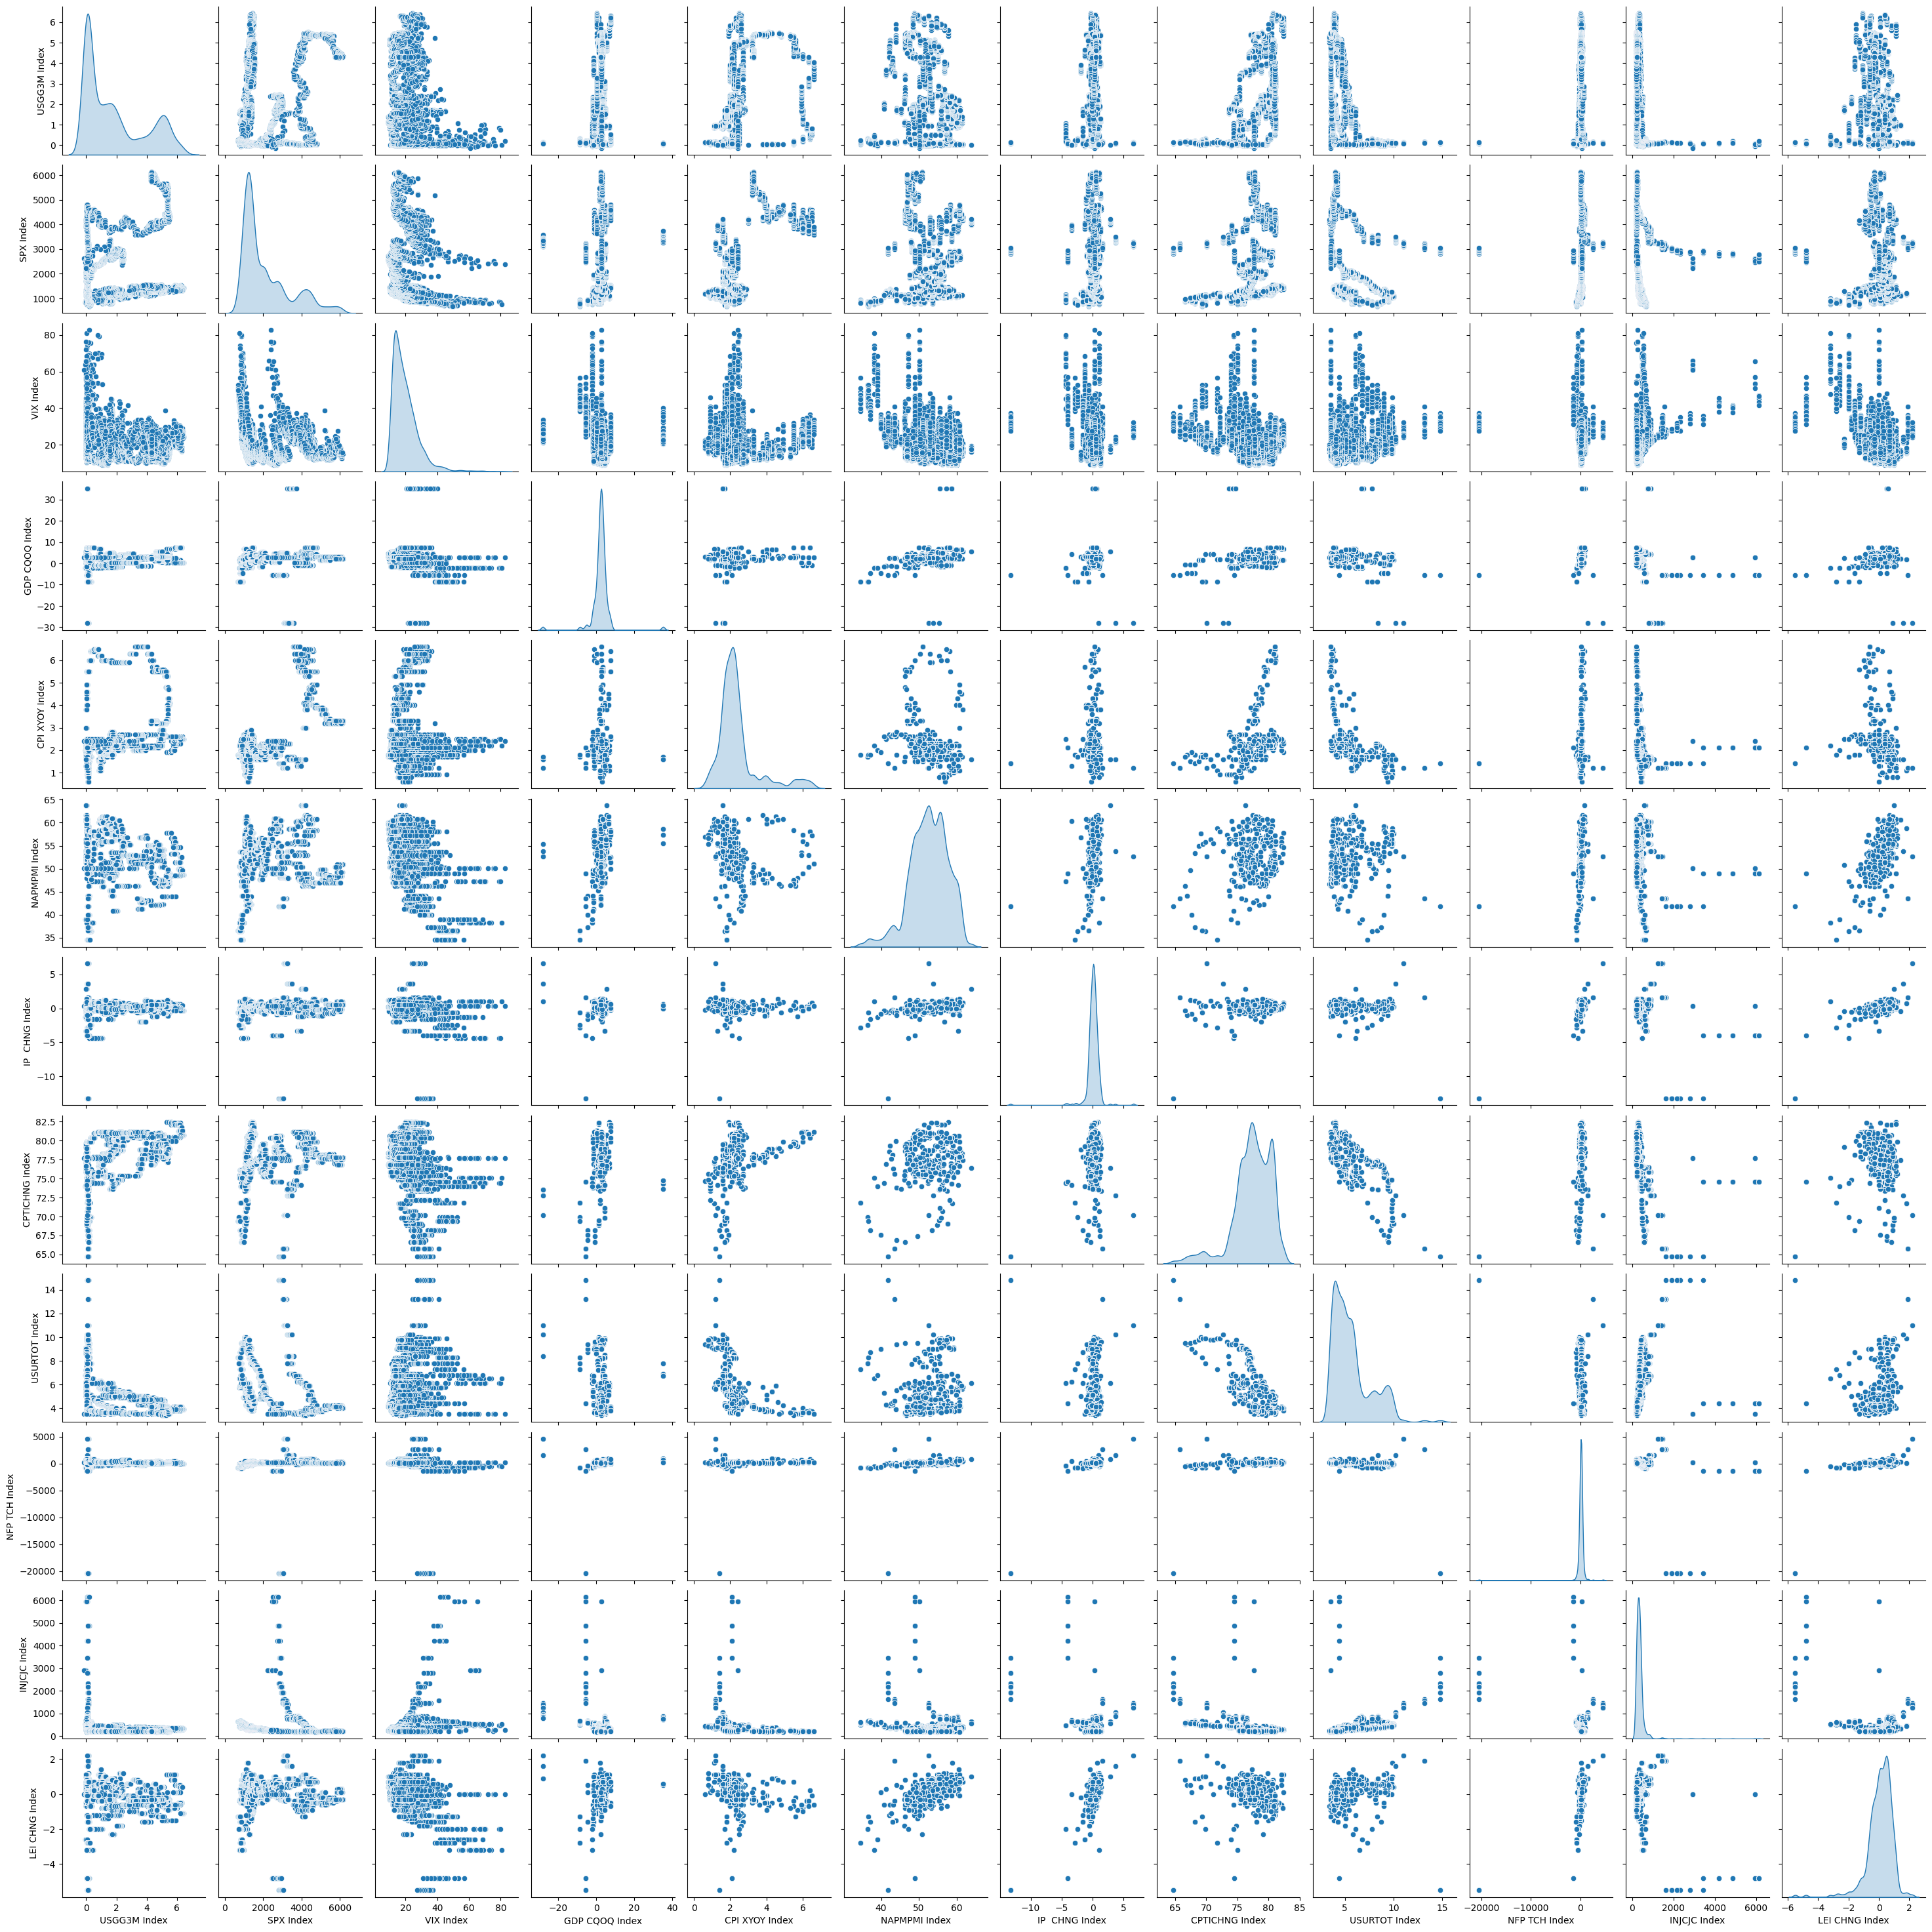

In [38]:
sns.pairplot(data_subset, diag_kind='kde')

In [39]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USGG3M Index,5256.0,1.851637,1.968214,-0.1372,0.0915,1.1590,3.4210,6.4350
SPX Index,5256.0,2135.184996,1279.525007,676.5300,1203.0050,1495.9950,2760.6600,6144.1500
VIX Index,5256.0,19.770381,8.337444,9.1400,13.8400,17.7350,23.2625,82.6900
GDP CQOQ Index,5256.0,2.334817,5.051902,-28.1000,1.3000,2.5000,3.5000,35.2000
CPI XYOY Index,5256.0,2.385845,1.131148,0.6000,1.7000,2.2000,2.5000,6.6000
NAPMPMI Index,5256.0,52.590620,5.059410,34.5000,49.2000,52.9000,56.2000,63.8000
IP CHNG Index,5256.0,0.054753,1.136389,-13.2400,-0.2800,0.0900,0.4700,6.5800
CPTICHNG Index,5256.0,77.389035,3.096918,64.6982,75.8344,77.6904,79.7148,82.4391
USURTOT Index,5256.0,5.674372,1.954351,3.4000,4.2000,5.0000,6.3000,14.8000
NFP TCH Index,5256.0,97.875381,1244.151872,-20471.0000,55.5000,158.0000,250.0000,4631.0000


In [40]:
train_features = train_dataset.copy()[predictors]
test_features = test_dataset.copy()[predictors]

train_labels = train_dataset.copy()[targets]
test_labels = test_dataset.copy()[targets]

In [41]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
USGG3M Index,1.851637,1.968214
SPX Index,2135.184996,1279.525007
VIX Index,19.770381,8.337444
GDP CQOQ Index,2.334817,5.051902
CPI XYOY Index,2.385845,1.131148
NAPMPMI Index,52.590620,5.059410
IP CHNG Index,0.054753,1.136389
CPTICHNG Index,77.389035,3.096918
USURTOT Index,5.674372,1.954351
NFP TCH Index,97.875381,1244.151872


In [42]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [43]:
normalizer.adapt(np.array(train_features))

In [44]:
print(normalizer.mean.numpy())

[[2.1351851e+03 1.9770380e+01 2.3348174e+00 2.3858447e+00 5.2590622e+01
  5.4752663e-02 7.7389038e+01 5.6743722e+00 9.7875381e+01 3.7440582e+02
  6.4079151e-02]]


In [45]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[4500.53   23.22    7.4     6.     57.4     0.02   79.85    4.    225.
   209.     -0.7 ]]

Normalized: [[ 1.85  0.41  1.    3.2   0.95 -0.03  0.79 -0.86  0.1  -0.47 -0.91]]


In [46]:
spx = np.array(train_features['SPX Index'])

spx_normalizer = layers.Normalization(input_shape=[1,], axis=None)
spx_normalizer.adapt(spx)

c:\Users\Iantb\Documents\GitHub\BondRiskPremiumANN\myenv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
spx_model = tf.keras.Sequential([
    spx_normalizer,
    layers.Dense(units=1)
])

spx_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [48]:
cpi = np.array(train_features['CPI XYOY Index'])

cpi_normalizer = layers.Normalization(input_shape=[1,], axis=None)
spx_normalizer.adapt(cpi)

In [49]:
cpi_model = tf.keras.Sequential([
    spx_normalizer,
    layers.Dense(units=1)
])

spx_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [50]:
spx_model.predict(spx[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[6409.7036],
       [5890.945 ],
       [2238.2002],
       [1349.8052],
       [6268.532 ],
       [1831.7715],
       [2917.8237],
       [1935.2382],
       [2057.0159],
       [3554.    ]], dtype=float32)

In [51]:
cpi_model.predict(cpi[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[-0.27763033],
       [-0.24690334],
       [ 0.05268487],
       [ 0.06804837],
       [-0.1624041 ],
       [ 0.06804837],
       [ 0.06036662],
       [ 0.09109361],
       [-0.02413263],
       [ 0.05268487]], dtype=float32)

In [52]:
spx_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [53]:
cpi_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [54]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [label]')
  plt.legend()
  plt.grid(True)

In [55]:
%%time
history = spx_model.fit(
    train_features['SPX Index'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 16.4 s
Wall time: 11.8 s


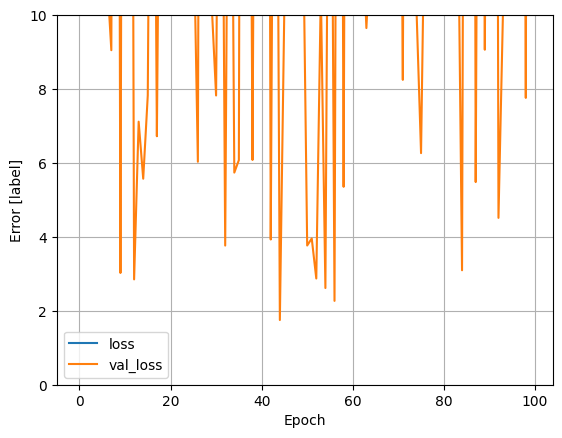

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_loss(history)

In [ ]:
test_results = {}

test_results['spx_model'] = spx_model.evaluate(
    test_features['SPX Index'],
    test_labels, verbose=0)

In [57]:
%%time
history = cpi_model.fit(
    train_features['CPI XYOY Index'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 16.2 s
Wall time: 11.6 s


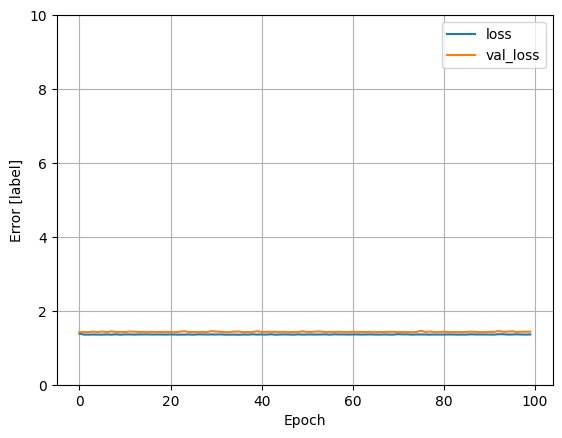

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_loss(history)

In [ ]:
test_results['cpi_model'] = cpi_model.evaluate(
    test_features['CPI XYOY Index'],
    test_labels, verbose=0)